In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import eda_helper_functions

In [4]:
train=pd.read_csv("train_data.csv")

In [5]:
train.head(3)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Air India,2019-05-24,Kolkata,Banglore,16:50:00,07:55:00,905,1.0,No Info,8576
1,Indigo,2019-06-03,Delhi,Cochin,15:10:00,20:00:00,290,1.0,No Info,6493
2,Air India,2019-05-15,Delhi,Cochin,20:40:00,09:25:00,765,1.0,No Info,7480


In [6]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [9]:
train=train.assign(**{
    col:pd.to_datetime(train.loc[:,col],dayfirst=True,format="mixed")
    for col in ["date_of_journey","dep_time","arrival_time"]
})

In [10]:
train.head(3)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Air India,2019-05-24,Kolkata,Banglore,2024-06-06 16:50:00,2024-06-06 07:55:00,905,1.0,No Info,8576
1,Indigo,2019-06-03,Delhi,Cochin,2024-06-06 15:10:00,2024-06-06 20:00:00,290,1.0,No Info,6493
2,Air India,2019-05-15,Delhi,Cochin,2024-06-06 20:40:00,2024-06-06 09:25:00,765,1.0,No Info,7480


In [12]:
train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

In [13]:
## for numeric data
train.describe(include="number")

,duration,total_stops,price
count,640.000000,640.000000,640.000000
mean,642.375000,0.821875,8865.535938
std,507.420276,0.698415,4191.626598
min,80.000000,0.000000,1759.000000
25%,170.000000,0.000000,5200.250000
50%,525.000000,1.000000,8073.000000
75%,961.250000,1.000000,12193.750000
max,2480.000000,3.000000,26890.000000


In [14]:
(
    train
    .assign(total_stops=train["total_stops"].astype(object))
    .describe(include="O")
    
)

,airline,source,destination,total_stops,additional_info
count,640,640,640,640.0,640
unique,8,5,6,4.0,5
top,Jet Airways,Delhi,Cochin,1.0,No Info
freq,211,269,269,311.0,509


In [15]:
## Analysis of missing data
eda_helper_functions.missing_info(train)

,count,percentage
variable,,


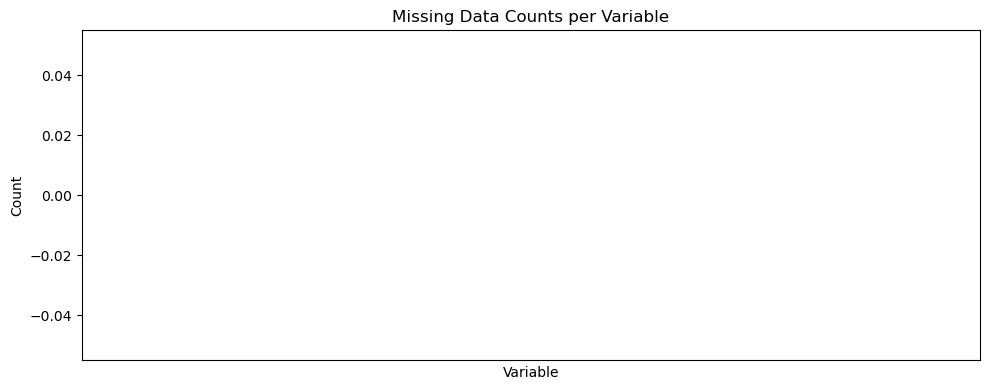

In [17]:
eda_helper_functions.plot_missing_info(train)

### There is no missing value present in our dataset

In [18]:
##checking outlier
from sklearn.ensemble import IsolationForest

In [19]:
forest=IsolationForest(n_estimators=10,random_state=42)

In [20]:
(
    train
    .assign(
        outlier=forest.fit_predict(
            train
            .drop(columns="price")
            .select_dtypes(include="number")
        )
    )
    .query("outlier==-1")
)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
1,Indigo,2019-06-03,Delhi,Cochin,2024-06-06 15:10:00,2024-06-06 20:00:00,290,1.0,No Info,6493,-1
4,Spicejet,2019-03-21,Mumbai,Hyderabad,2024-06-06 22:45:00,2024-06-06 00:10:00,85,0.0,No Info,1759,-1
6,Jet Airways,2019-03-18,Mumbai,Hyderabad,2024-06-06 10:20:00,2024-06-06 11:50:00,90,0.0,No Info,8040,-1
8,Jet Airways,2019-05-09,Delhi,Cochin,2024-06-06 09:40:00,2024-06-06 19:00:00,560,2.0,In-flight meal not included,13029,-1
10,Indigo,2019-04-24,Kolkata,Banglore,2024-06-06 19:35:00,2024-06-06 23:15:00,220,1.0,No Info,4226,-1
...,...,...,...,...,...,...,...,...,...,...,...
624,Jet Airways,2019-03-01,Banglore,New Delhi,2024-06-06 11:40:00,2024-06-06 07:40:00,1200,1.0,No Info,22270,-1
626,Jet Airways,2019-03-06,Banglore,New Delhi,2024-06-06 08:00:00,2024-06-06 08:15:00,1455,1.0,No Info,17996,-1
633,Air India,2019-06-01,Delhi,Cochin,2024-06-06 19:00:00,2024-06-06 19:15:00,1455,1.0,No Info,8792,-1
638,Air India,2019-05-01,Chennai,Kolkata,2024-06-06 11:40:00,2024-06-06 13:55:00,135,0.0,No Info,4667,-1


### PairPlot

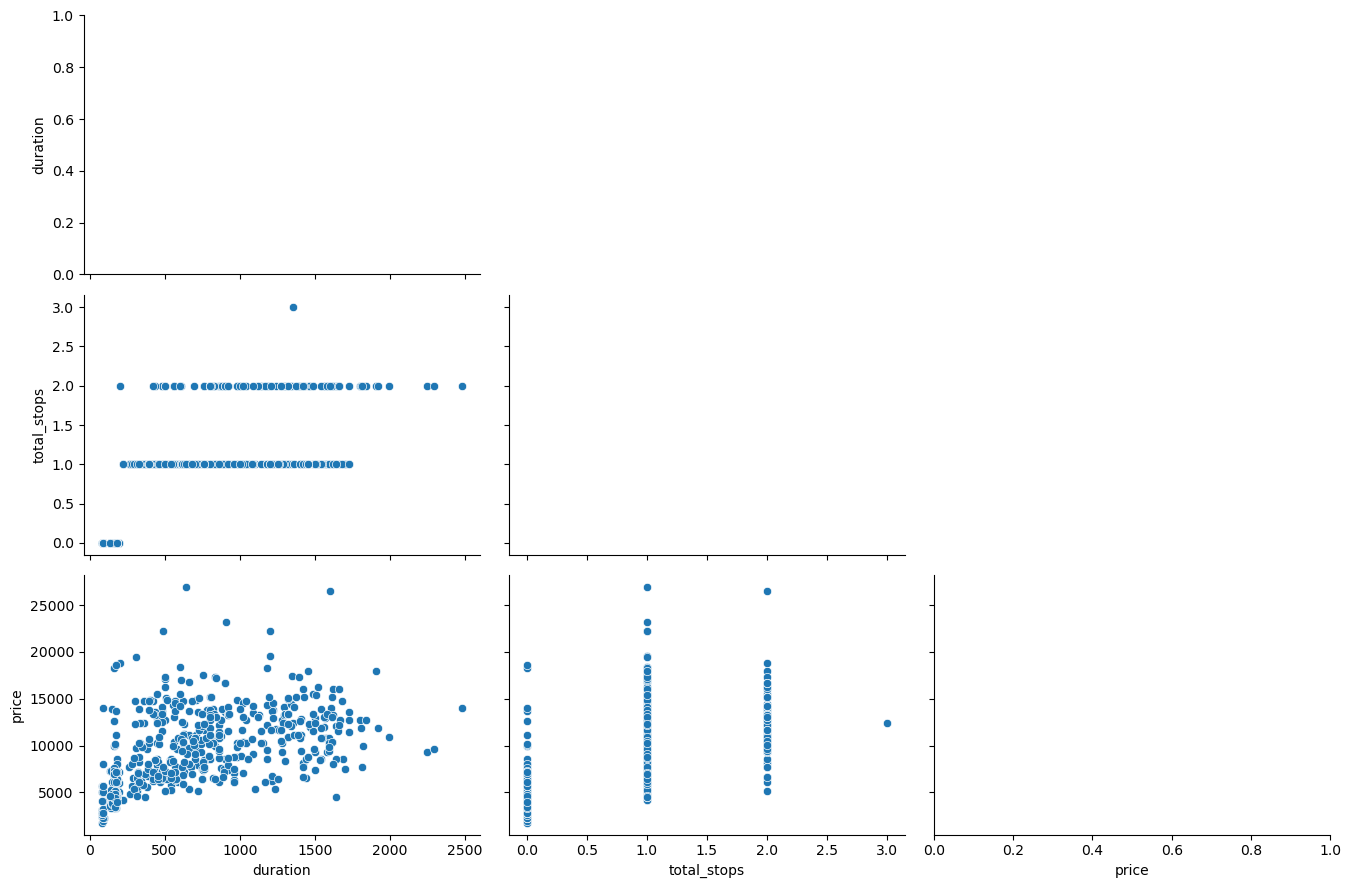

In [21]:
eda_helper_functions.pair_plots(train)

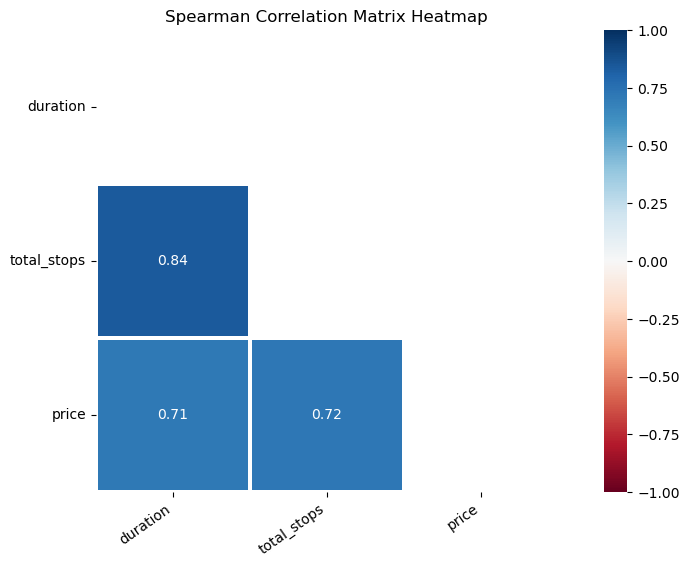

In [22]:
eda_helper_functions.correlation_heatmap(train)

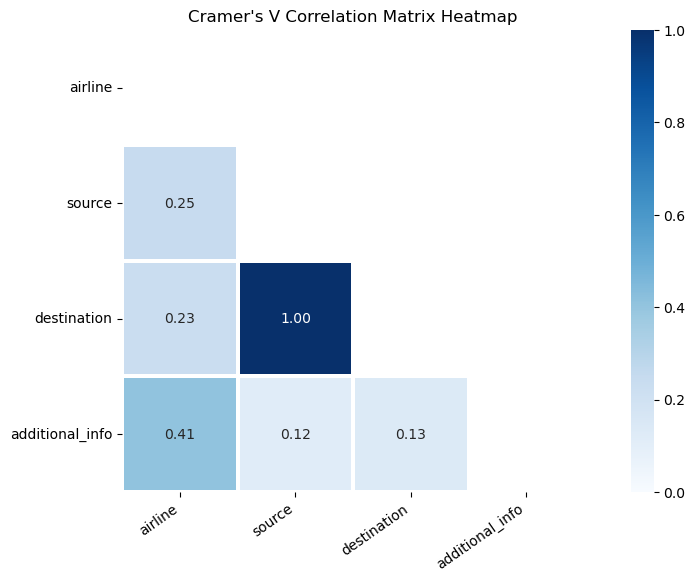

In [23]:
eda_helper_functions.cramersV_heatmap(train)

### Detailed Analysis

In [25]:
train.airline

0              Air India
1                 Indigo
2              Air India
3      Multiple Carriers
4               Spicejet
             ...        
635    Multiple Carriers
636             Spicejet
637          Jet Airways
638            Air India
639               Indigo
Name: airline, Length: 640, dtype: object

In [26]:
eda_helper_functions.cat_summary(train,"airline")

0              Air India
1                 Indigo
2              Air India
3      Multiple Carriers
4               Spicejet
             ...        
635    Multiple Carriers
636             Spicejet
637          Jet Airways
638            Air India
639               Indigo
Name: airline, Length: 640, dtype: object

Data Type      : object
Cardinality    : 8 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,8
top,Jet Airways
freq,211


,count,percentage
category,,
Jet Airways,211,0.329688
Indigo,129,0.201563
Air India,118,0.184375
Multiple Carriers,68,0.106250
Spicejet,50,0.078125
Vistara,27,0.042188
Goair,21,0.032813
Air Asia,16,0.025000


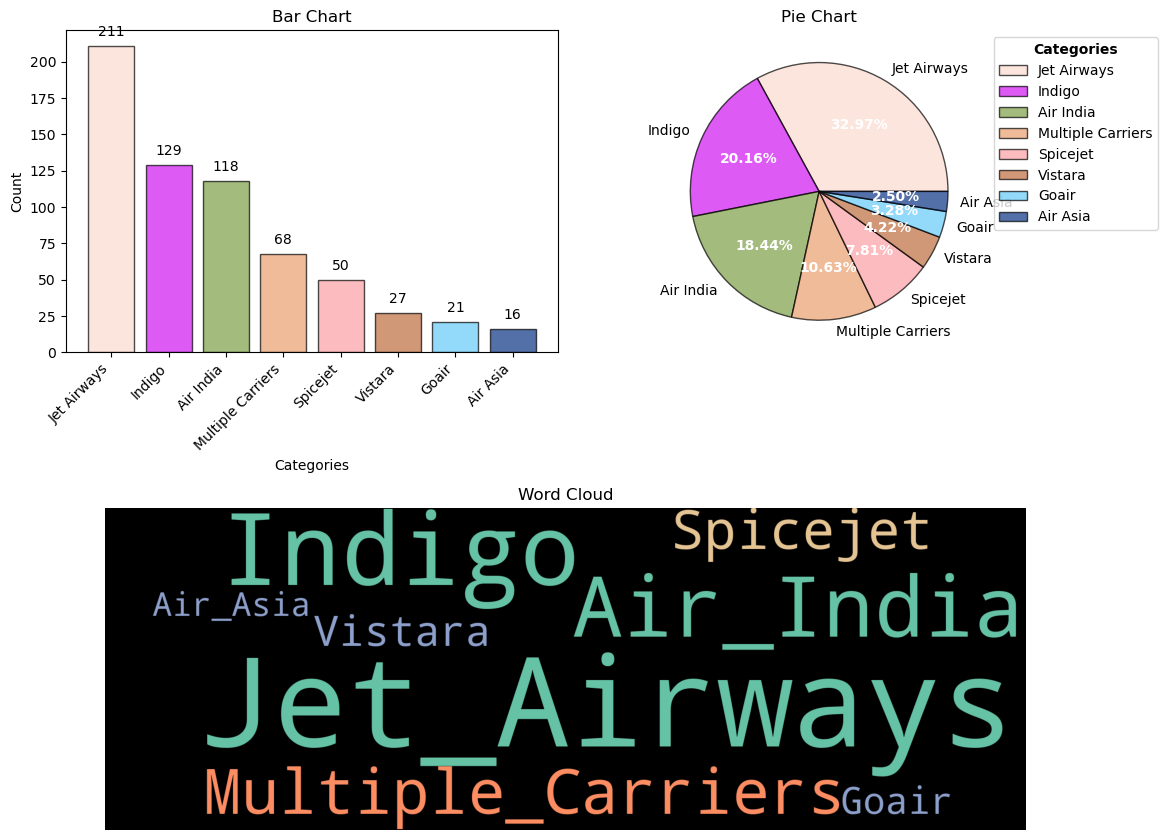

In [27]:
eda_helper_functions.cat_univar_plots(train,"airline")

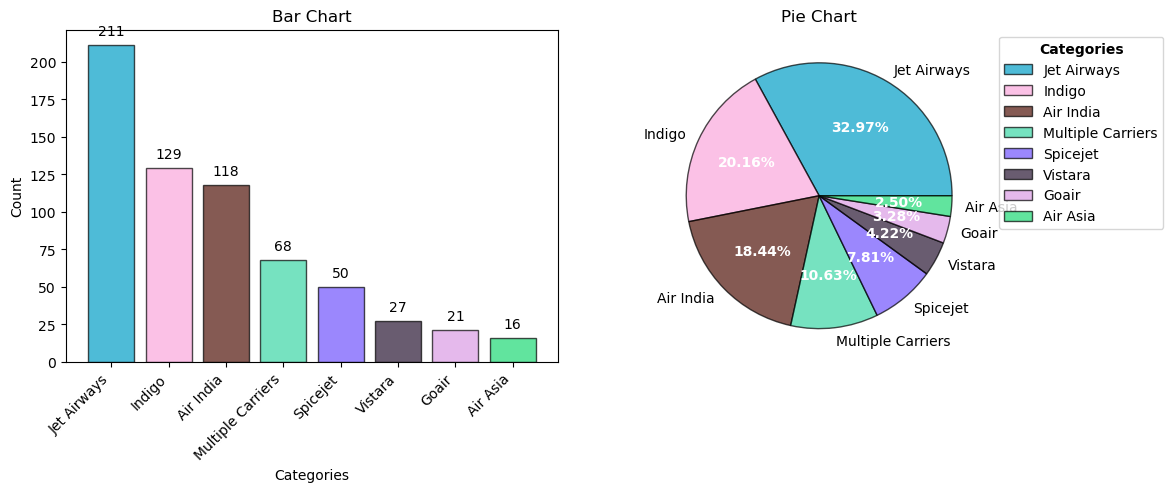

In [28]:
eda_helper_functions.cat_univar_plots(train,"airline",show_wordcloud=False)

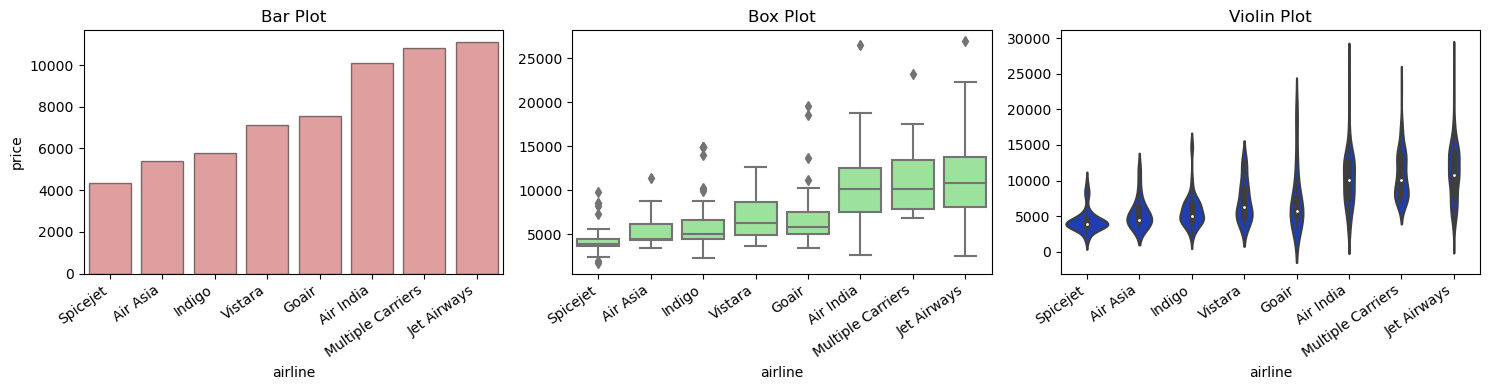

In [31]:
eda_helper_functions.num_cat_bivar_plots(
    data=train,
    num_var="price",
    cat_var="airline"
)

In [32]:
eda_helper_functions.num_cat_hyp_testing(train,"price","airline")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 51.21946111189156
- p-value              : 9.287508016176022e-58
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 273.53009210252355
- p-value              : 2.691594206258633e-55
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


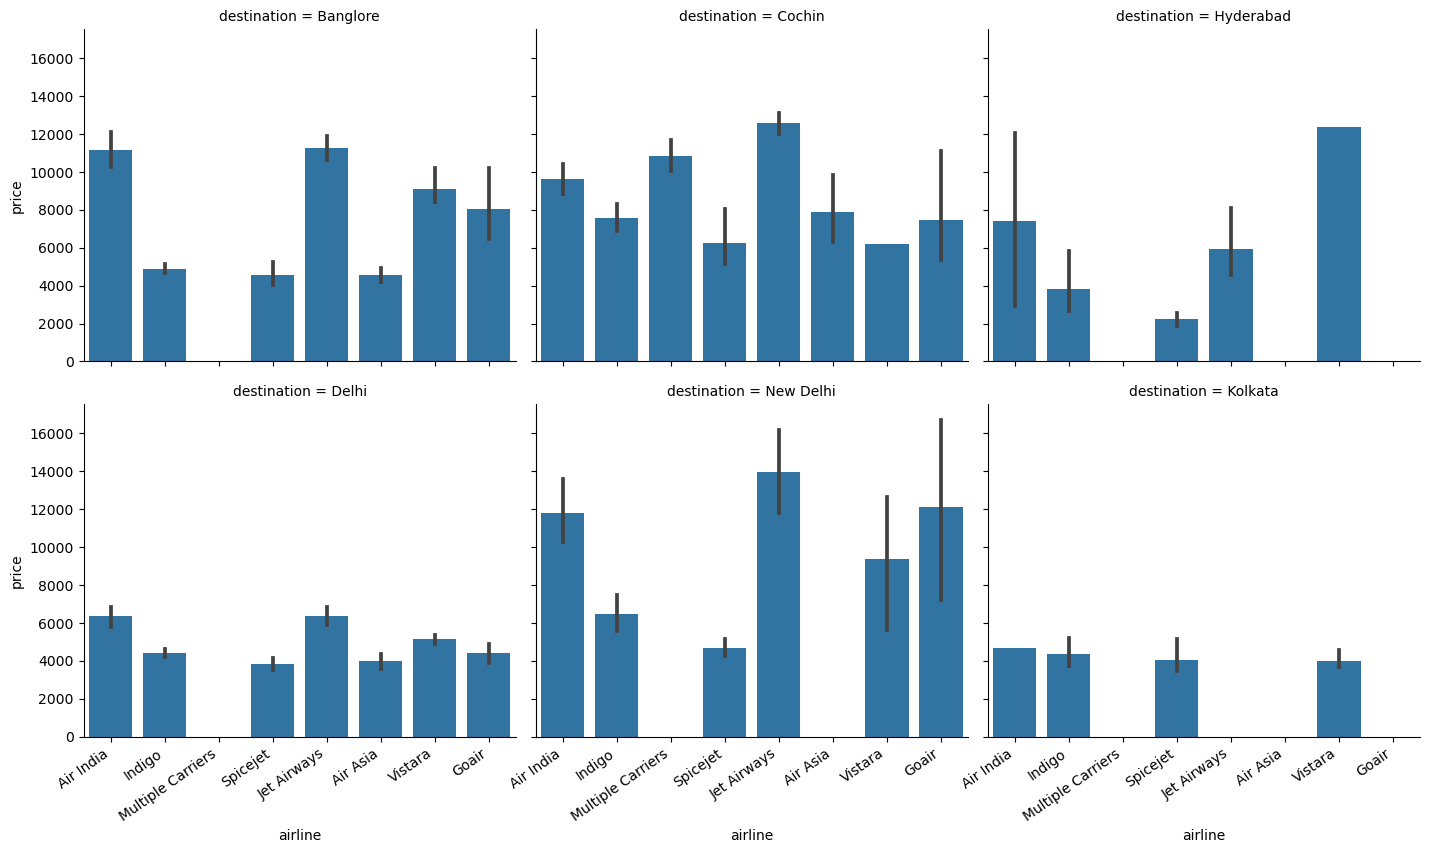

In [36]:
airline_grid=sns.FacetGrid(
    data=train,
    col="destination",
    col_wrap=3,
    height=4,
    aspect=1.2,
    sharey=True
)

airline_grid.map(sns.barplot,"airline","price",order=train.airline.unique())
for ax in airline_grid.axes[3:]:
    eda_helper_functions.rotate_xlabels(ax)

### Date of Journey

In [40]:
train.date_of_journey[2]

Timestamp('2019-05-15 00:00:00')

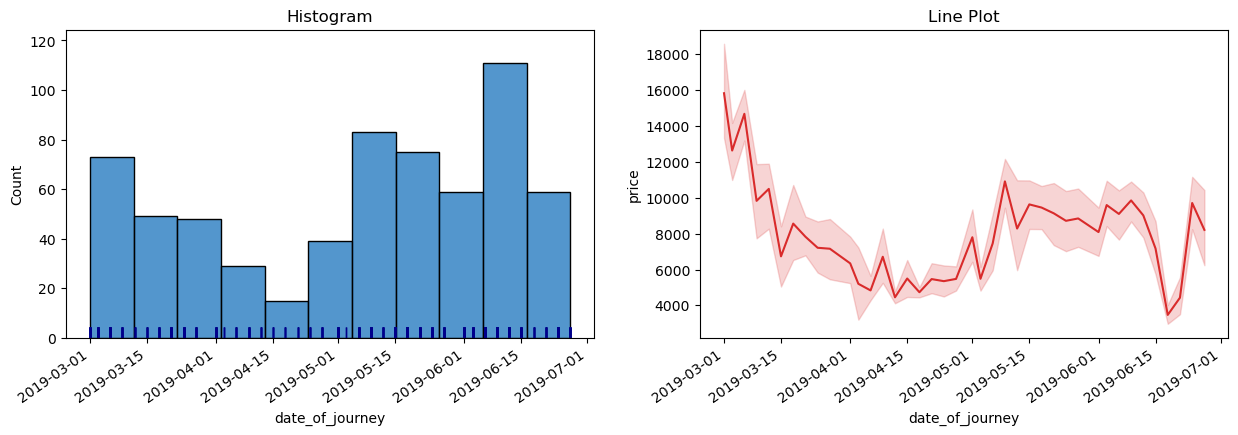

In [43]:
eda_helper_functions.dt_univar_plots(data=train,var="date_of_journey",target="price")

<Axes: xlabel='month'>

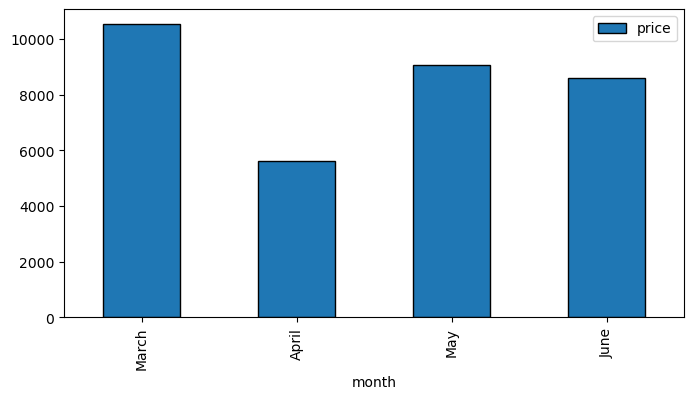

In [49]:
(
    train
    .groupby(pd.Grouper(key="date_of_journey",freq="M"))
    .price.mean()
    .to_frame()
    .set_axis(["March","April","May","June"],axis=0)
    .rename_axis(index="month")
    .plot(kind="bar",figsize=(8,4),edgecolor="black")
)

### dep_time

In [50]:
train.dep_time

0     2024-06-06 16:50:00
1     2024-06-06 15:10:00
2     2024-06-06 20:40:00
3     2024-06-06 13:05:00
4     2024-06-06 22:45:00
              ...        
635   2024-06-06 07:10:00
636   2024-06-06 09:30:00
637   2024-06-06 11:40:00
638   2024-06-06 11:40:00
639   2024-06-06 21:15:00
Name: dep_time, Length: 640, dtype: datetime64[ns]

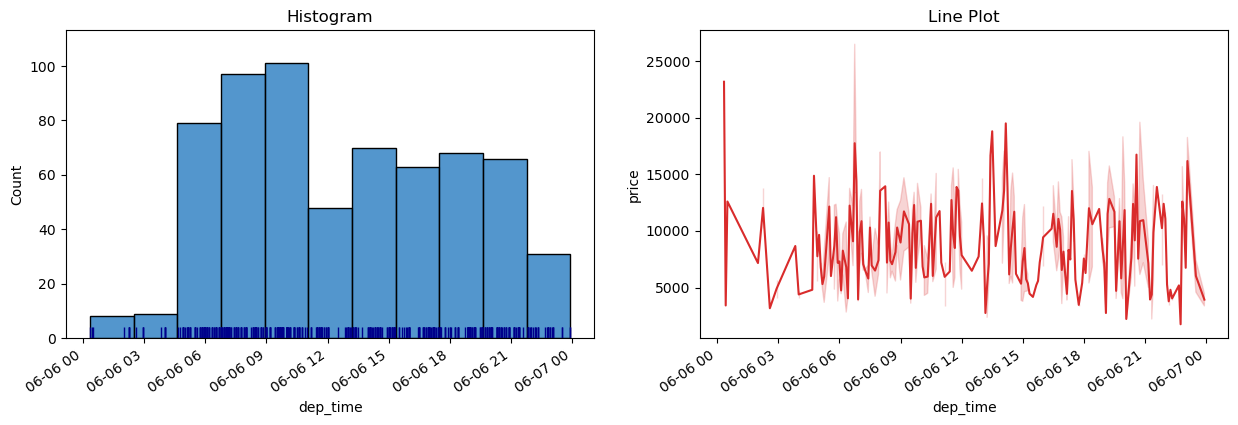

In [51]:
eda_helper_functions.dt_univar_plots(train,"dep_time","price")

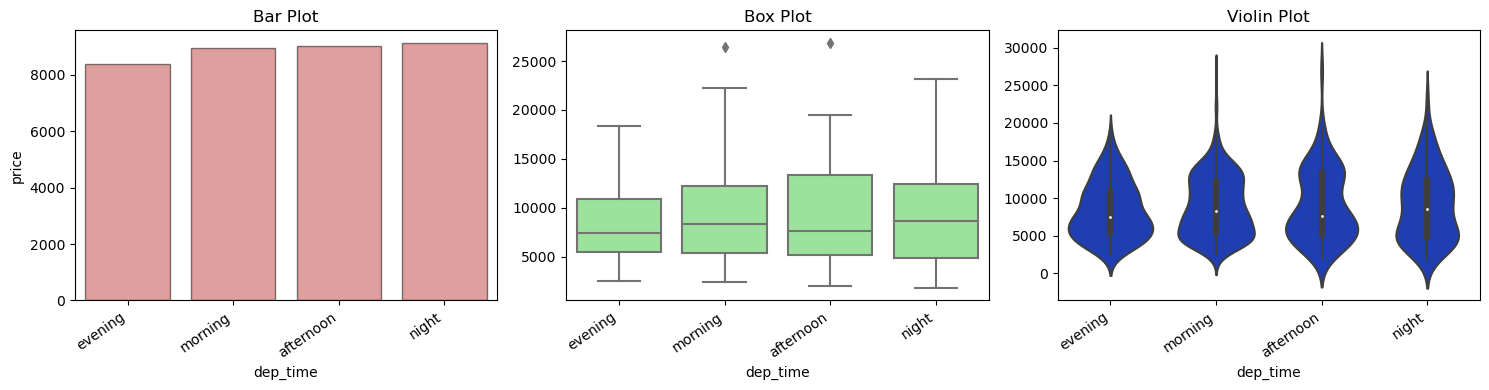

In [54]:
(
    train
    .assign(
        dep_time=lambda df_:(
            np.select([
                df_.dep_time.dt.hour.between(4,12,inclusive="left"),
                df_.dep_time.dt.hour.between(12,16,inclusive="left"),
                df_.dep_time.dt.hour.between(16,20,inclusive="left")
                
            ],
                     ["morning","afternoon","evening"],
                     default="night")
        )
    )
    .pipe(eda_helper_functions.num_cat_bivar_plots,"price","dep_time")
)

### duration

In [55]:
train.duration

0      905
1      290
2      765
3      710
4       85
      ... 
635    540
636    170
637    680
638    135
639    180
Name: duration, Length: 640, dtype: int64

In [56]:
train.duration.isnull().sum()

0

In [58]:
eda_helper_functions.num_summary(train,"duration")

0      905
1      290
2      765
3      710
4       85
      ... 
635    540
636    170
637    680
638    135
639    180
Name: duration, Length: 640, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,value
percentile,
0,80.00
5,90.00
10,150.00
25,170.00
50,525.00
75,961.25
90,1441.50
95,1610.25
99,1832.20


,value
mean,642.375000
trimmed mean (5%),610.434028
trimmed mean (10%),582.441406
median,525.000000


,value
var,257475.336463
std,507.420276
IQR,791.250000
mad,355.000000
coef_variance,0.789913


,value
skewness,0.811684
kurtosis,-0.286111


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 4.031026416174931e-21
Test Statistic       : 0.8881197571754456
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.782
Test Statistic       : 23.868978017462382
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


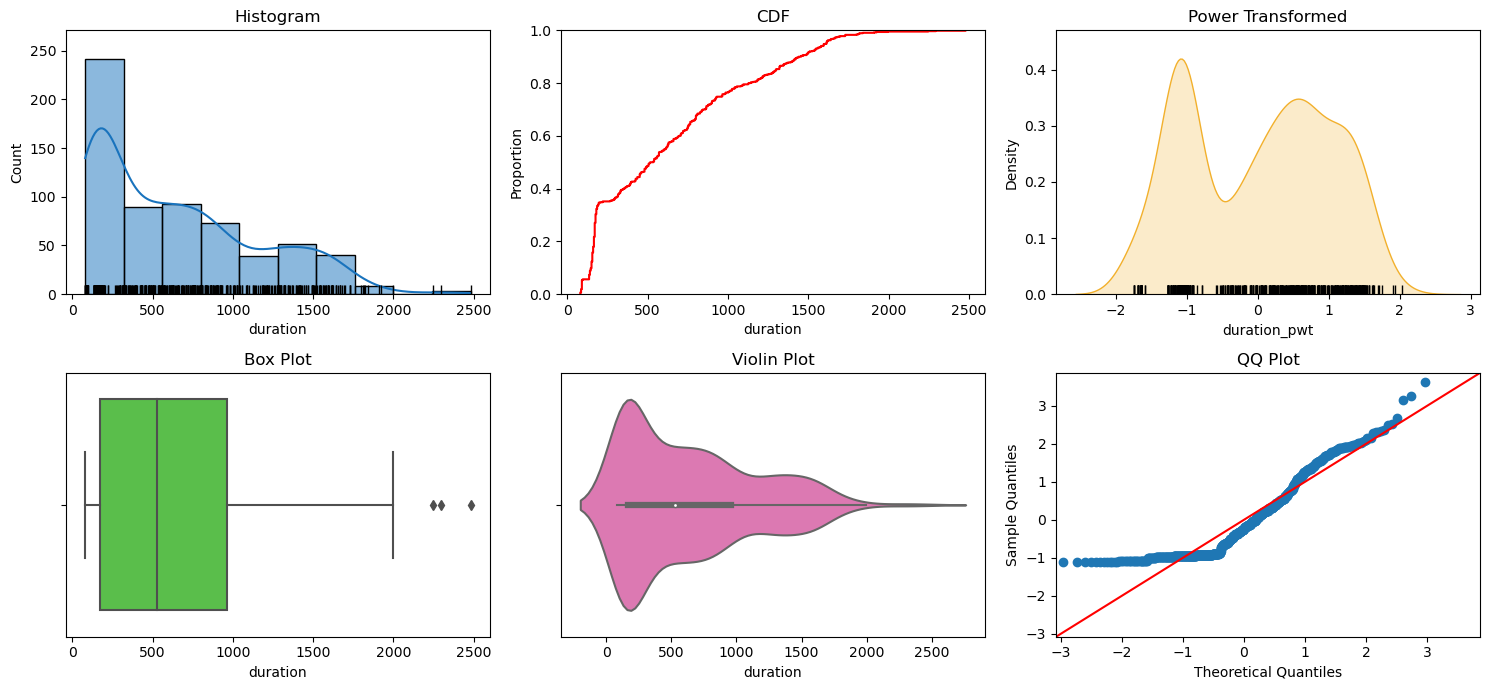

In [59]:
eda_helper_functions.num_univar_plots(train,"duration")

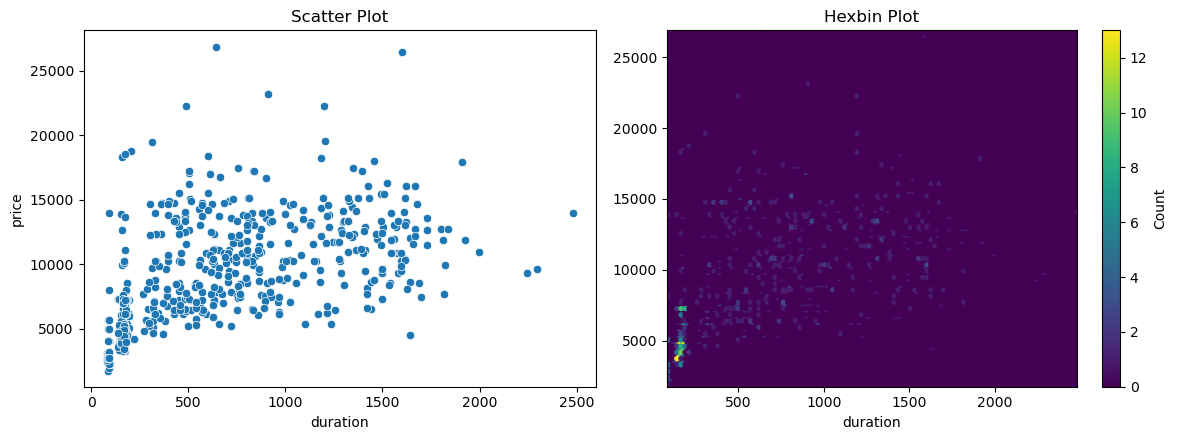

In [61]:
eda_helper_functions.num_bivar_plots(train,"duration","price")

In [62]:
eda_helper_functions.num_num_hyp_testing(train,"price","duration")

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.5784960976333171
- p-value              : 1.936917451174167e-58
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.7146817841767512
- p-value              : 3.974266987213377e-101
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


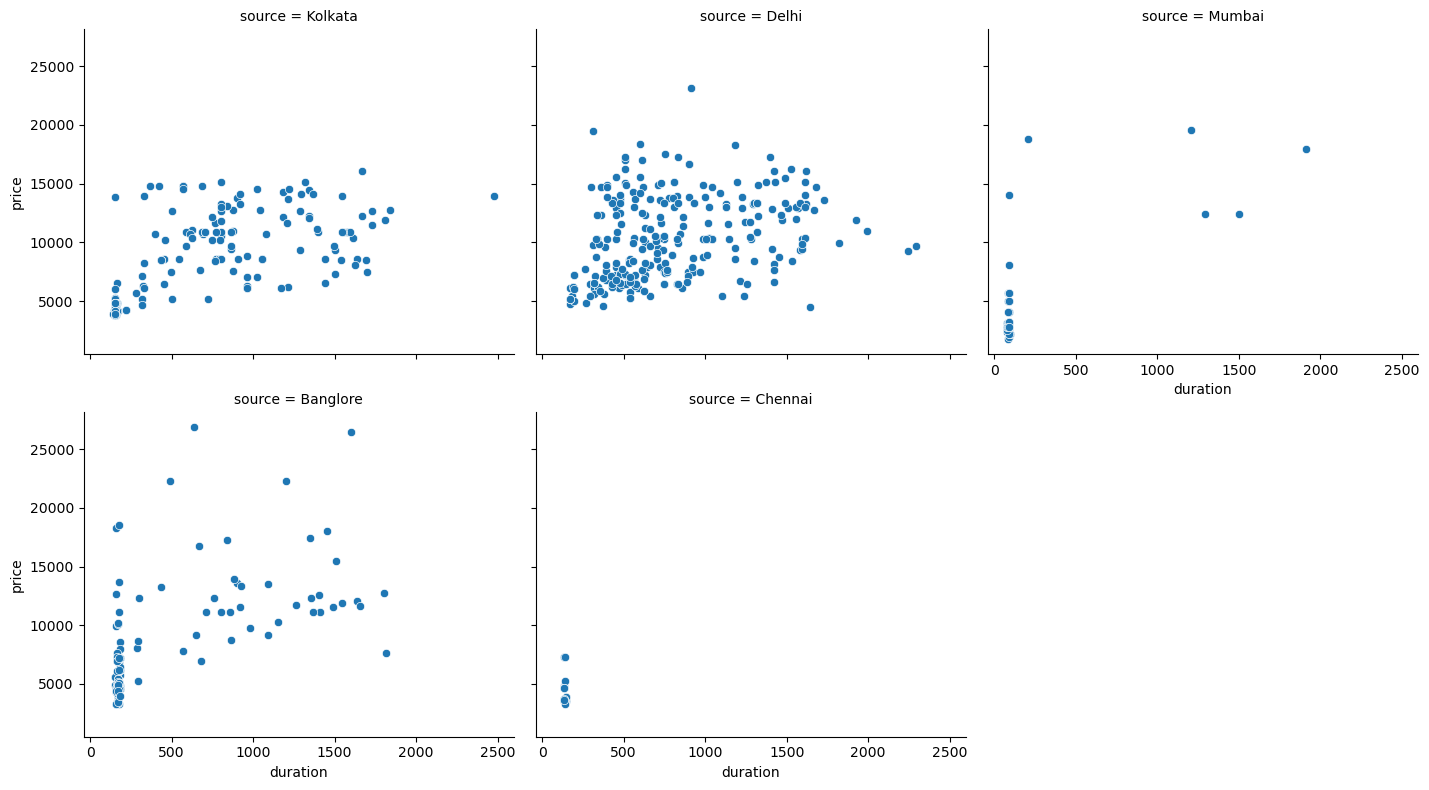

In [63]:
airline_grid=sns.FacetGrid(
    data=train,
    col="source",
    col_wrap=3,
    height=4,
    aspect=1.2,
    sharey=True
)

airline_grid.map(sns.scatterplot,"duration","price")


In [64]:
eda_helper_functions.get_iqr_outliers(train,"duration")

Lower Limit : -1016.875
Upper Limit : 2148.125


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
302,Jet Airways,2019-03-27,Delhi,Cochin,2024-06-06 06:20:00,2024-06-06 19:45:00,2245,2.0,In-flight meal not included,9296
456,Air India,2019-05-09,Delhi,Cochin,2024-06-06 05:00:00,2024-06-06 19:15:00,2295,2.0,No Info,9653
147,Air India,2019-03-24,Kolkata,Banglore,2024-06-06 05:55:00,2024-06-06 23:15:00,2480,2.0,No Info,13990


### Additional Information

In [65]:
eda_helper_functions.cat_summary(train,"additional_info")

0                          No Info
1                          No Info
2                          No Info
3                          No Info
4                          No Info
                  ...             
635                        No Info
636                        No Info
637    In-flight meal not included
638                        No Info
639                        No Info
Name: additional_info, Length: 640, dtype: object

Data Type      : object
Cardinality    : 5 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,5
top,No Info
freq,509


,count,percentage
category,,
No Info,509,0.795312
In-flight meal not included,111,0.173437
No check-in baggage included,17,0.026562
1 Long layover,2,0.003125
2 Long layover,1,0.001563


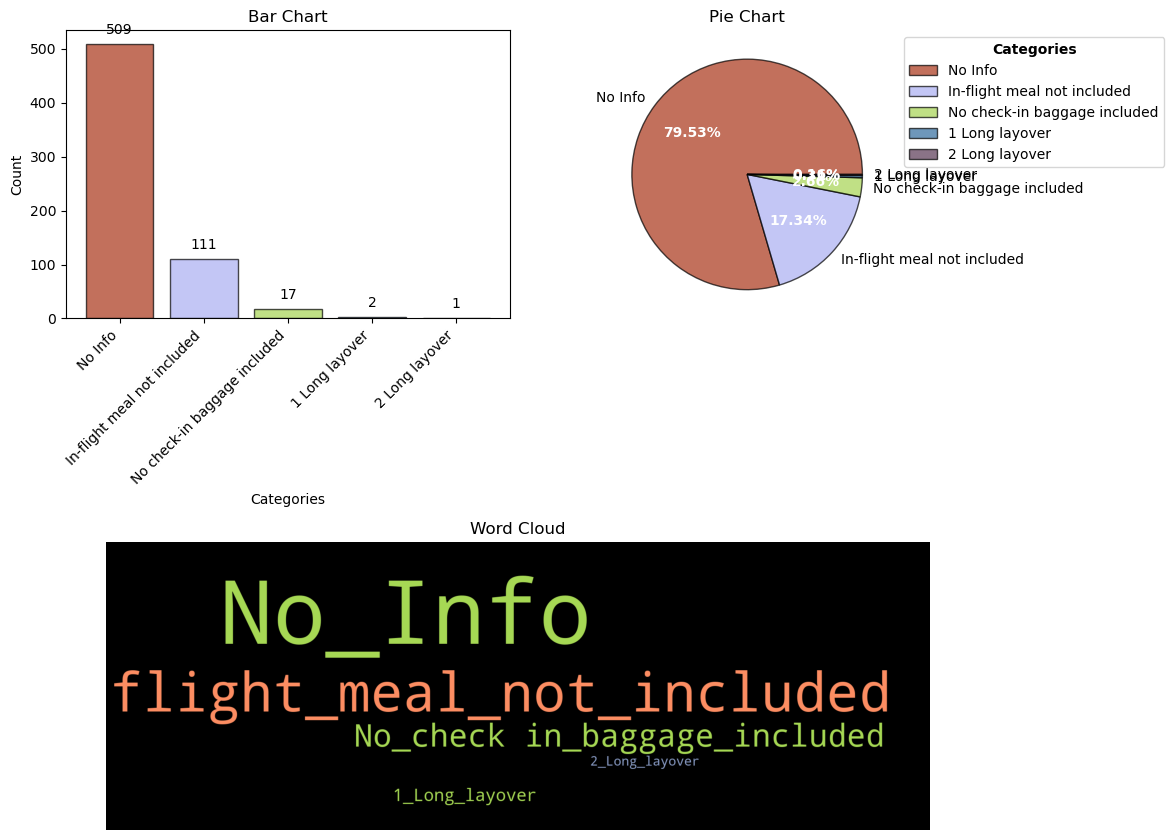

In [66]:
eda_helper_functions.cat_univar_plots(train,"additional_info")

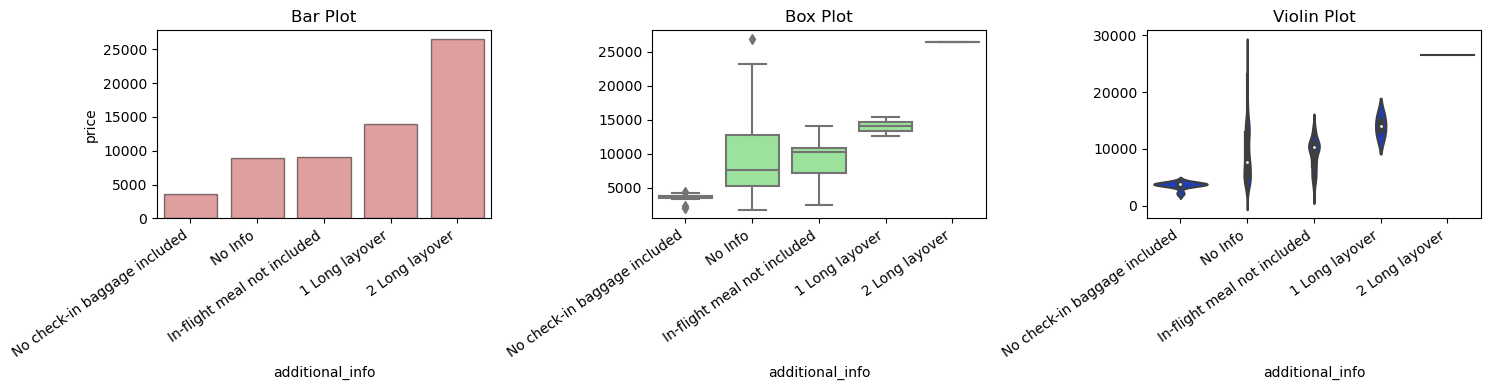

In [67]:
eda_helper_functions.num_cat_bivar_plots(train,"price","additional_info")